## Lasso Regression

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [2]:
dataset = fetch_california_housing()
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
LR = LinearRegression()
LR.fit(X_train,y_train)
train_score_LR= LR.score(X_train,y_train)

In [5]:
#Lasso regression model
print("\n.....................Lasso Model.................................\n")
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
print("The train score for the lasso model is{}".format(train_score_ls))


.....................Lasso Model.................................

The train score for the lasso model is0.5488267992849574


In [6]:
#Ridge Regression Model
print("\nRidge Model................................................")
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(X_train,y_train)
train_score_ridge =ridgeReg.score(X_train,y_train)
print("The train score for the ridge model is{}".format(train_score_ridge))


Ridge Model................................................
The train score for the ridge model is0.6090156804624769


In [7]:
enet_model = ElasticNet(alpha = 0.1).fit(X_train,y_train)
train_enet_score= enet_model.score(X_train,y_train)

In [8]:
# Testing a model on testing data set
LR_test_score = LR.score(X_test,y_test)
lasso_test_score =lasso.score(X_test,y_test)
Ridge_test_score =ridgeReg.score(X_test,y_test)
enet_test_score = enet_model.score(X_test,y_test)

result = pd.DataFrame({'LR score':[train_score_LR,LR_test_score],
                      'Lasso score':[train_score_ls,lasso_test_score],
                      'Ridge score':[train_score_ridge,Ridge_test_score],
                      'Enet score':[train_enet_score,enet_test_score]},
                       index = ['Train score','Test score'])

In [9]:
print(result)

             LR score  Lasso score  Ridge score  Enet score
Train score  0.609016     0.548827     0.609016    0.579716
Test score   0.594579     0.523638     0.594578    0.557387


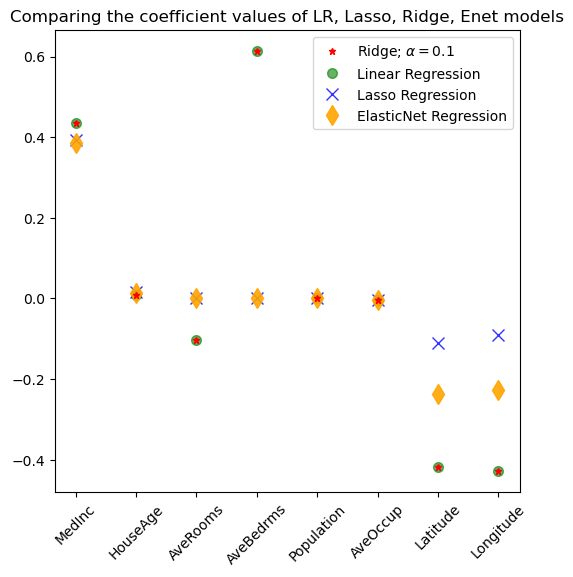

In [10]:
#Lest plot the coefficient for both the linear and ridge models.
plt.figure(figsize = (6,6))
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha=1,linestyle='none',
         marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.1$',zorder=7)

plt.plot(dataset.feature_names,LR.coef_,alpha=0.6,linestyle='none',
         marker='o',markersize=7,color='green',label='Linear Regression')

plt.plot(dataset.feature_names,lasso.coef_,alpha=0.8,linestyle='none',
          marker='x',markersize=9,color='blue',label='Lasso Regression')


plt.plot(dataset.feature_names, enet_model.coef_,alpha=0.9,linestyle='none',
          marker='d',markersize=10,color='orange',label='ElasticNet Regression')

plt.xticks(rotation = 45)
plt.title('Comparing the coefficient values of LR, Lasso, Ridge, Enet models')
plt.legend()
plt.show()

## Using Cross Validation

In [11]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

## Lasso Cross Validation

In [12]:
#Using the linear CV model
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
#lasso Cross validation
lasso_cv=LassoCV(alphas=[0.0001,0.0002,0.0009,0.0001,0.002,0.0003,0.01,0.1,1,10],
                  random_state=10).fit(X_train,y_train)

#score
print(f'training score:{lasso_cv.score(X_train,y_train)}')
print(lasso_cv.alpha_)

training score:0.6088668691740275
0.002


## Ridge Cross Validation

In [13]:
#Using th#Using the linear CV model
from sklearn.linear_model import ElasticNetCV

#ElasticNet Cross validation
ElasticNet_cv = ElasticNetCV(alphas = [0.001,0.002,0.003,0.025,0.035,0.01,0.02,0.1,0.2,1.1,1.10]).fit(X_train,y_train)

#score
print("The train score for elasticnetCV model is {}".format(ElasticNet_cv.score(X_train,y_train)))
ElasticNet_cv.alpha_


The train score for elasticnetCV model is 0.60883767847806


0.003

In [14]:
np.log(4)

1.3862943611198906

In [18]:
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [28]:
alpha = np.logspace(-4,-1,10)
score = np.empty_like(alpha)

for i, a in enumerate(alpha):
    lasso=Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    score[i] = lasso.score(X_test, y_test)

print(score)

[0.59454473 0.59450471 0.59441549 0.59420946 0.59370145 0.59230927
 0.58792785 0.57907547 0.5666033  0.52363775]


0.03221092661065105


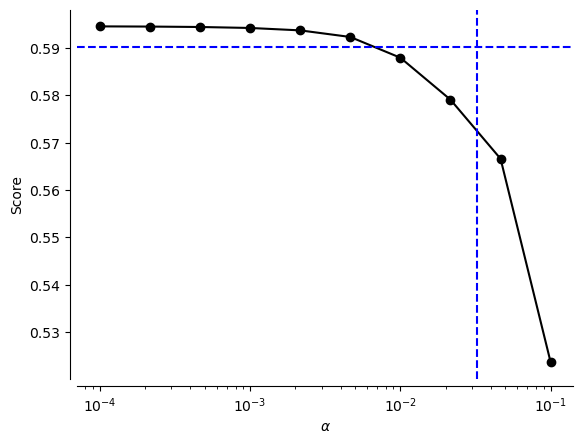

In [31]:
# comparing alpha values with scores
lassocv = LassoCV(random_state=0)
lassocv.fit(X,y)
lassocv_score = lassocv.score(X,y)
lassocv_alpha = lassocv.alpha_
print(lasso_alpha)
#print('CV', lassocv.coef_)
plt.plot(alpha, score, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=5)

## Model Tuning

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train, return_estimator=True, n_jobs=2)
print(cv_results)

{'fit_time': array([0.1226716 , 0.12167501, 0.09974504, 0.10172701, 0.07080889]), 'score_time': array([0.00099683, 0.00199342, 0.00198388, 0.00199461, 0.0009973 ]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [36]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.63949534 0.60571284 0.61115815 0.56191319 0.60883357]
R2 score: 0.605 ± 0.025


In [43]:
from sklearn.preprocessing import Normalizer
alphas = np.logspace(-3, 1, num=30)
model=make_pipeline(Normalizer(), ElasticNetCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train, return_estimator=True, n_jobs=2)
print(cv_results)

{'fit_time': array([0.12465882, 0.12266397, 0.11568975, 0.11369538, 0.09275126]), 'score_time': array([0.00199461, 0.00299287, 0.00199556, 0.00199533, 0.00199485]), 'estimator': [Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.887391

In [44]:
!pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata


In [45]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
wine_quality = fetch_ucirepo(id=186)


ConnectionError: Error connecting to server

## Task 18th July

In [1]:
import pandas as pd
import numpy as np
# Read dataset using pandas
df = pd.read_csv(r"C:\Users\J G TECH\Downloads\Sales.csv")
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,01 7 2015,01 8 2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,06 13 2015,06 15 2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,02 15 2015,02 17 2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,05 12 2015,05 14 2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,05 12 2015,05 13 2015,-24.0300,7,22.23,86838


In [2]:
df.dtypes

Row ID                    int64
Order Priority           object
Discount                float64
Unit Price              float64
Shipping Cost           float64
Customer ID               int64
Customer Name            object
Ship Mode                object
Customer Segment         object
Product Category         object
Product Sub-Category     object
Product Container        object
Product Name             object
Product Base Margin     float64
Country                  object
Region                   object
State or Province        object
City                     object
Postal Code               int64
Order Date               object
Ship Date                object
Profit                  float64
Quantity ordered new      int64
Sales                   float64
Order ID                  int64
dtype: object

In [3]:
df.tail()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,03 11 2015,03 12 2015,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,03 11 2015,03 12 2015,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,03 29 2015,03 31 2015,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,04 4 2015,04 4 2015,-24.7104,15,135.78,87537
1951,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,02 8 2015,02 11 2015,349.4850,5,506.50,87530


In [4]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

In [6]:
df['Order Date']

0        01 7 2015
1       06 13 2015
2       02 15 2015
3       05 12 2015
4       05 12 2015
           ...    
1947    03 11 2015
1948    03 11 2015
1949    03 29 2015
1950     04 4 2015
1951     02 8 2015
Name: Order Date, Length: 1952, dtype: object

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

In [8]:
df['Order Date']

0      2015-01-07
1      2015-06-13
2      2015-02-15
3      2015-05-12
4      2015-05-12
          ...    
1947   2015-03-11
1948   2015-03-11
1949   2015-03-29
1950   2015-04-04
1951   2015-02-08
Name: Order Date, Length: 1952, dtype: datetime64[ns]

In [9]:
df['Customer Name'] = df['Customer Name'].astype('string') 

In [10]:
df['Customer Name']

0           Bonnie Potter
1          Ronnie Proctor
2           Marcus Dunlap
3       Gwendolyn F Tyson
4       Gwendolyn F Tyson
              ...        
1947          Andrea Shaw
1948          Andrea Shaw
1949          Marvin Reid
1950        Florence Gold
1951        Tammy Buckley
Name: Customer Name, Length: 1952, dtype: string

In [11]:
df['Customer Name'].head()

0        Bonnie Potter
1       Ronnie Proctor
2        Marcus Dunlap
3    Gwendolyn F Tyson
4    Gwendolyn F Tyson
Name: Customer Name, dtype: string

In [12]:
help(pd.Series.astype)

Help on function astype in module pandas.core.generic:

astype(self: 'NDFrameT', dtype, copy: 'bool_t | None' = None, errors: 'IgnoreRaise' = 'raise') -> 'NDFrameT'
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : str, data type, Series or Mapping of column name -> data type
        Use a str, numpy.dtype, pandas.ExtensionDtype or Python type to
        cast entire pandas object to the same type. Alternatively, use a
        mapping, e.g. {col: dtype, ...}, where col is a column label and dtype is
        a numpy.dtype or Python type to cast one or more of the DataFrame's
        columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
  

In [13]:
df['Order Priority'] = df['Order Priority'].astype('string') 
df['Customer ID'] = df['Customer ID'].astype('bool') 
df['Country'] = df['Country'].astype('string') 
df['Region'] = df['Region'].astype('string') 
df['Profit'] = df['Profit'].astype('bool') 
df['City'] = df['City'].astype('string') 

In [14]:
df.dtypes

Row ID                           int64
Order Priority          string[python]
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                       bool
Customer Name           string[python]
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Country                 string[python]
Region                  string[python]
State or Province               object
City                    string[python]
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date                       object
Profit                            bool
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [15]:
columns = {'Customer Name':'Customer_Name', 
           'Order Date':'Order_date', 
           'Order Priority':'Order_Priority', 
            'State or Province':'State/Province', 
           'Ship Mode':'Ship_Mode'}
df.rename(columns = columns, inplace=True)

In [16]:
df.columns, df.shape

(Index(['Row ID', 'Order_Priority', 'Discount', 'Unit Price', 'Shipping Cost',
        'Customer ID', 'Customer_Name', 'Ship_Mode', 'Customer Segment',
        'Product Category', 'Product Sub-Category', 'Product Container',
        'Product Name', 'Product Base Margin', 'Country', 'Region',
        'State/Province', 'City', 'Postal Code', 'Order_date', 'Ship Date',
        'Profit', 'Quantity ordered new', 'Sales', 'Order ID'],
       dtype='object'),
 (1952, 25))

In [17]:
df.nunique()

Row ID                  1951
Order_Priority             6
Discount                  13
Unit Price               597
Shipping Cost            497
Customer ID                1
Customer_Name           1130
Ship_Mode                  3
Customer Segment           4
Product Category           3
Product Sub-Category      17
Product Container          7
Product Name             913
Product Base Margin       51
Country                    1
Region                     4
State/Province            49
City                     869
Postal Code              981
Order_date               179
Ship Date                187
Profit                     1
Quantity ordered new      76
Sales                   1922
Order ID                1365
dtype: int64

In [18]:
df['Region'].value_counts()

Region
Central    566
East       474
West       470
South      442
Name: count, dtype: Int64

In [19]:
df['Product Category'].value_counts()

Product Category
Office Supplies    1071
Technology          481
Furniture           400
Name: count, dtype: int64

## Handling Missing Values

In [20]:
df.isnull().sum(), df.isna().sum()

(Row ID                   0
 Order_Priority           0
 Discount                 0
 Unit Price               0
 Shipping Cost            0
 Customer ID              0
 Customer_Name            0
 Ship_Mode                0
 Customer Segment         0
 Product Category         0
 Product Sub-Category     0
 Product Container        0
 Product Name             0
 Product Base Margin     16
 Country                  0
 Region                   0
 State/Province           0
 City                     0
 Postal Code              0
 Order_date               0
 Ship Date                0
 Profit                   0
 Quantity ordered new     0
 Sales                    0
 Order ID                 0
 dtype: int64,
 Row ID                   0
 Order_Priority           0
 Discount                 0
 Unit Price               0
 Shipping Cost            0
 Customer ID              0
 Customer_Name            0
 Ship_Mode                0
 Customer Segment         0
 Product Category         0
 Prod

In [21]:
df["Order_Priority"].fillna("Order_Priority", inplace = True)

In [22]:
df["Order_Priority"].isnull().sum()

0

In [23]:
df['Region'].mode()[0]

'Central'

In [24]:
df.isnull().sum()

Row ID                   0
Order_Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer_Name            0
Ship_Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State/Province           0
City                     0
Postal Code              0
Order_date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [25]:
df = df.dropna(axis = 0, how ='any')

In [26]:
df.isnull().sum()

Row ID                  0
Order_Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer_Name           0
Ship_Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State/Province          0
City                    0
Postal Code             0
Order_date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1936 non-null   int64         
 1   Order_Priority        1936 non-null   string        
 2   Discount              1936 non-null   float64       
 3   Unit Price            1936 non-null   float64       
 4   Shipping Cost         1936 non-null   float64       
 5   Customer ID           1936 non-null   bool          
 6   Customer_Name         1936 non-null   string        
 7   Ship_Mode             1936 non-null   object        
 8   Customer Segment      1936 non-null   object        
 9   Product Category      1936 non-null   object        
 10  Product Sub-Category  1936 non-null   object        
 11  Product Container     1936 non-null   object        
 12  Product Name          1936 non-null   object        
 13  Product Base Margin   1

In [28]:
df = df.reset_index()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 1936 non-null   int64         
 1   Row ID                1936 non-null   int64         
 2   Order_Priority        1936 non-null   string        
 3   Discount              1936 non-null   float64       
 4   Unit Price            1936 non-null   float64       
 5   Shipping Cost         1936 non-null   float64       
 6   Customer ID           1936 non-null   bool          
 7   Customer_Name         1936 non-null   string        
 8   Ship_Mode             1936 non-null   object        
 9   Customer Segment      1936 non-null   object        
 10  Product Category      1936 non-null   object        
 11  Product Sub-Category  1936 non-null   object        
 12  Product Container     1936 non-null   object        
 13  Product Name      

In [30]:
df

,index,Row ID,Order_Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer_Name,Ship_Mode,Customer Segment,...,Region,State/Province,City,Postal Code,Order_date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,0,20847,High,0.01,2.84,0.93,True,Bonnie Potter,Express Air,Corporate,...,West,Washington,Anacortes,98221,2015-01-07,01 8 2015,True,4,13.01,88522
1,1,20228,Not Specified,0.02,500.98,26.00,True,Ronnie Proctor,Delivery Truck,Home Office,...,West,California,San Gabriel,91776,2015-06-13,06 15 2015,True,12,6362.85,90193
2,2,21776,Critical,0.06,9.48,7.29,True,Marcus Dunlap,Regular Air,Home Office,...,East,New Jersey,Roselle,7203,2015-02-15,02 17 2015,True,22,211.15,90192
3,3,24844,Medium,0.09,78.69,19.99,True,Gwendolyn F Tyson,Regular Air,Small Business,...,Central,Minnesota,Prior Lake,55372,2015-05-12,05 14 2015,True,16,1164.45,86838
4,4,24846,Medium,0.08,3.28,2.31,True,Gwendolyn F Tyson,Regular Air,Small Business,...,Central,Minnesota,Prior Lake,55372,2015-05-12,05 13 2015,True,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,1947,19842,High,0.01,10.90,7.46,True,Andrea Shaw,Regular Air,Small Business,...,Central,Illinois,Danville,61832,2015-03-11,03 12 2015,True,18,207.31,87536
1932,1948,19843,High,0.10,7.99,5.03,True,Andrea Shaw,Regular Air,Small Business,...,Central,Illinois,Danville,61832,2015-03-11,03 12 2015,True,22,143.12,87536
1933,1949,26208,Not Specified,0.08,11.97,5.81,True,Marvin Reid,Regular Air,Small Business,...,Central,Illinois,Des Plaines,60016,2015-03-29,03 31 2015,True,5,59.98,87534
1934,1950,24911,Medium,0.10,9.38,4.93,True,Florence Gold,Express Air,Small Business,...,East,West Virginia,Fairmont,26554,2015-04-04,04 4 2015,True,15,135.78,87537


In [31]:
df.drop(['index'],axis = 1,inplace = True)

In [32]:
df.head()

,Row ID,Order_Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer_Name,Ship_Mode,Customer Segment,Product Category,...,Region,State/Province,City,Postal Code,Order_date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,True,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,01 8 2015,True,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,True,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,06 15 2015,True,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,True,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,02 17 2015,True,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,True,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,05 14 2015,True,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,True,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,05 13 2015,True,7,22.23,86838


In [33]:
df['Sales_Order_ID'] = round(df['Sales'] + ((df['Sales'] * df['Order ID'])/100),2)
df['Sales_Order_ID']

0         11529.72
1       5745208.15
2        190651.56
3       1012349.54
4         19326.32
           ...    
1931     181678.19
1932     125424.64
1933      52562.87
1934     118993.52
1935     443845.95
Name: Sales_Order_ID, Length: 1936, dtype: float64

In [34]:
df.head()

,Row ID,Order_Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer_Name,Ship_Mode,Customer Segment,Product Category,...,State/Province,City,Postal Code,Order_date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Sales_Order_ID
0,20847,High,0.01,2.84,0.93,True,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2015-01-07,01 8 2015,True,4,13.01,88522,11529.72
1,20228,Not Specified,0.02,500.98,26.00,True,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,California,San Gabriel,91776,2015-06-13,06 15 2015,True,12,6362.85,90193,5745208.15
2,21776,Critical,0.06,9.48,7.29,True,Marcus Dunlap,Regular Air,Home Office,Furniture,...,New Jersey,Roselle,7203,2015-02-15,02 17 2015,True,22,211.15,90192,190651.56
3,24844,Medium,0.09,78.69,19.99,True,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Minnesota,Prior Lake,55372,2015-05-12,05 14 2015,True,16,1164.45,86838,1012349.54
4,24846,Medium,0.08,3.28,2.31,True,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Minnesota,Prior Lake,55372,2015-05-12,05 13 2015,True,7,22.23,86838,19326.32


## Outier Detection

<Axes: >

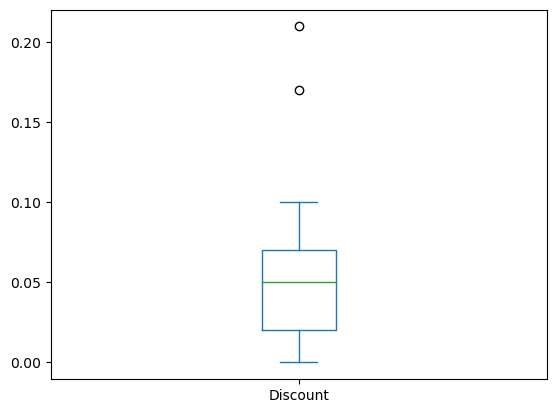

In [35]:
df['Discount'].plot(kind = 'box')

In [36]:
Q1_Quantity_ordered_new = np.quantile(df['Quantity ordered new'],0.25)
Q2_Quantity_ordered_new= np.quantile(df['Quantity ordered new'],0.50)
Q3_Quantity_ordered_new = np.quantile(df['Quantity ordered new'],0.75)
df['Quantity ordered new'].describe()

count    1936.000000
mean       12.965909
std        13.913943
min         1.000000
25%         5.000000
50%        10.000000
75%        16.000000
max       167.000000
Name: Quantity ordered new, dtype: float64

In [37]:
IQR = (Q3_Quantity_ordered_new - Q1_Quantity_ordered_new)/2
print("IQR: ", IQR)
Upper = Q3_Quantity_ordered_new+1.5*IQR
lower =  Q1_Quantity_ordered_new-1.5*IQR  
[lower,Upper]

IQR:  5.5


[-3.25, 24.25]

In [38]:
df['Sales_Order_ID'].min(),df['Sales_Order_ID'].max()

(1243.29, 17683002.97)

## Data Visualization

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Product Base Margin,Postal Code,Order_date,Quantity ordered new,Sales,Order ID,Sales_Order_ID
count,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936,1936.000000,1936.000000,1936.000000,1.936000e+03
mean,19917.548554,0.048858,108.034685,12.783280,0.515186,51545.004132,2015-03-29 01:14:22.809917440,12.965909,971.861968,82347.225207,6.690880e+05
min,64.000000,0.000000,1.140000,0.490000,0.350000,1001.000000,2015-01-01 00:00:00,1.000000,2.250000,359.000000,1.243290e+03
25%,19121.000000,0.020000,6.480000,3.032500,0.380000,28560.000000,2015-02-11 00:00:00,5.000000,58.515000,86783.750000,4.728704e+04
50%,21167.500000,0.050000,20.990000,6.095000,0.525000,48823.000000,2015-03-27 00:00:00,10.000000,200.660000,88376.000000,1.444729e+05
75%,23499.750000,0.070000,99.230000,14.000000,0.590000,78550.000000,2015-05-15 00:00:00,16.000000,774.920000,89961.000000,6.081278e+05
max,26389.000000,0.210000,6783.020000,164.730000,0.850000,99362.000000,2015-06-30 00:00:00,167.000000,45737.330000,91586.000000,1.768300e+07
std,5968.385953,0.031340,394.836173,17.289631,0.137055,29351.770516,NaN,13.913943,2559.347078,19075.071929,1.404986e+06


In [41]:
df.describe(include = ['string','bool'])

,Order_Priority,Customer ID,Customer_Name,Country,Region,City,Profit
count,1936,1936,1936,1936,1936,1936,1936
unique,6,1,1124,1,4,865,1
top,Low,True,Jenny Gold,United States,Central,New York City,True
freq,396,1936,9,1936,563,47,1936


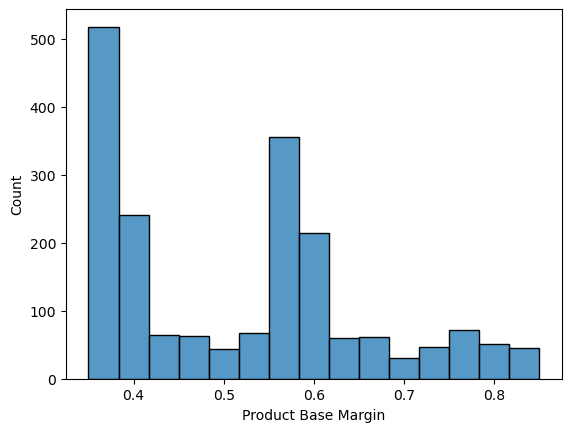

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Product Base Margin', data=df )
plt.show()

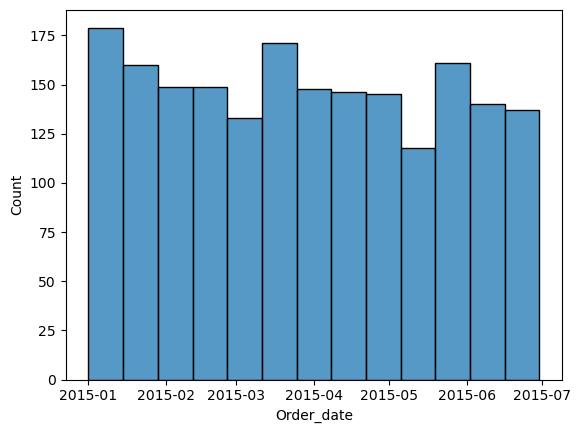

In [43]:
sns.histplot(x='Order_date', data=df )
plt.show()

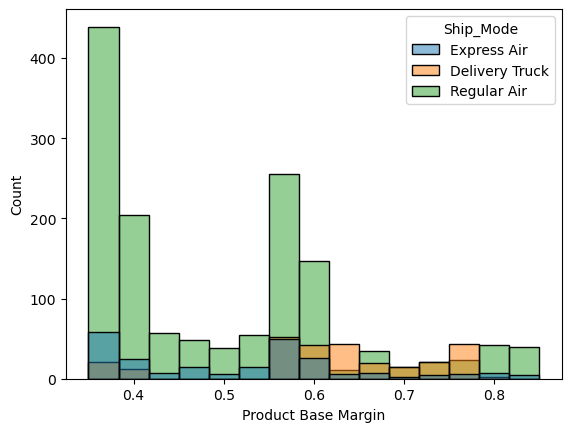

In [44]:
sns.histplot(x='Product Base Margin', hue = 'Ship_Mode',data=df )
plt.show()

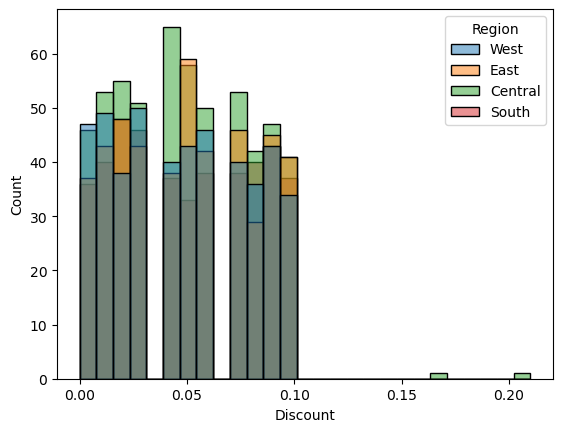

In [45]:
sns.histplot(x = 'Discount',hue = 'Region',data = df)
plt.show()

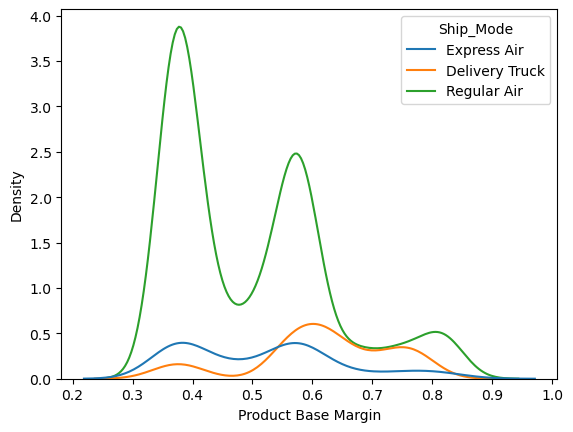

In [46]:
sns.kdeplot(x="Product Base Margin", hue = 'Ship_Mode',data=df )
plt.show()

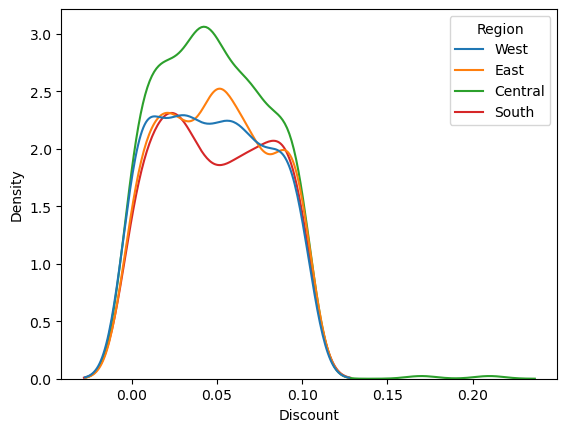

In [47]:
sns.kdeplot(x="Discount", hue='Region', data=df )
plt.show()

## Relationship Of Variables

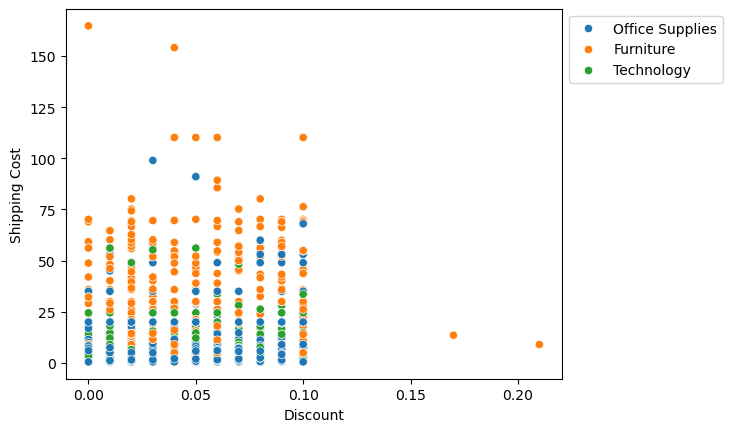

In [48]:
sns.scatterplot(x="Discount", y='Shipping Cost', data=df,hue = 'Product Category')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [49]:
df['Discount'].corr(df['Product Base Margin'])

0.018656260671621256

In [50]:
len(df[df['Discount']>=0.05])

1026

In [51]:
bonus19 = df[df['Discount']>0.05].sort_values(['Discount'],ascending = True)

In [52]:
bonus19

,Row ID,Order_Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer_Name,Ship_Mode,Customer Segment,Product Category,...,State/Province,City,Postal Code,Order_date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Sales_Order_ID
2,21776,Critical,0.06,9.48,7.29,True,Marcus Dunlap,Regular Air,Home Office,Furniture,...,New Jersey,Roselle,7203,2015-02-15,02 17 2015,True,22,211.15,90192,190651.56
346,6387,Critical,0.06,65.99,8.80,True,Neal Wolfe,Express Air,Consumer,Technology,...,Washington,Seattle,98119,2015-04-30,05 1 2015,True,34,1912.98,45380,870023.30
905,24265,Not Specified,0.06,3.29,1.35,True,Eugene Brewer Knox,Regular Air,Small Business,Office Supplies,...,New York,Bethpage,11714,2015-03-15,03 17 2015,True,11,35.97,90932,32744.21
895,23604,High,0.06,43.57,16.36,True,Aaron Day,Regular Air,Corporate,Office Supplies,...,Tennessee,Greeneville,37743,2015-05-28,05 30 2015,True,17,710.16,90602,644129.32
369,25059,Critical,0.06,161.55,19.99,True,Albert Frost,Regular Air,Small Business,Office Supplies,...,Missouri,Raytown,64133,2015-01-02,01 3 2015,True,3,485.01,88174,428137.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,19398,Low,0.10,34.23,5.02,True,Joanne Church,Regular Air,Corporate,Furniture,...,California,La Mesa,91941,2015-05-01,05 6 2015,True,7,219.66,88411,194423.26
846,23471,Critical,0.10,122.99,70.20,True,Earl Watts,Delivery Truck,Consumer,Furniture,...,Minnesota,Hopkins,55305,2015-06-14,06 15 2015,True,17,2026.91,89957,1825374.34
1935,25914,High,0.10,105.98,13.99,True,Tammy Buckley,Express Air,Consumer,Furniture,...,Wyoming,Cheyenne,82001,2015-02-08,02 11 2015,True,5,506.50,87530,443845.95
1208,20234,Critical,0.17,14.89,13.56,True,David Hoyle,Regular Air,Small Business,Furniture,...,Minnesota,Bloomington,55420,2015-03-25,03 27 2015,True,1,27.96,86054,24088.66


In [53]:
bonus19 = df[df['Discount']>0.05].sort_values(['Discount'],ascending = False)

In [54]:
bonus19

,Row ID,Order_Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer_Name,Ship_Mode,Customer Segment,Product Category,...,State/Province,City,Postal Code,Order_date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Sales_Order_ID
1773,21721,Critical,0.21,14.98,8.99,True,Kristine Singleton,Regular Air,Corporate,Furniture,...,Illinois,Naperville,60540,2015-03-04,03 5 2015,True,10,153.87,86792,133700.72
1208,20234,Critical,0.17,14.89,13.56,True,David Hoyle,Regular Air,Small Business,Furniture,...,Minnesota,Bloomington,55420,2015-03-25,03 27 2015,True,1,27.96,86054,24088.66
1935,25914,High,0.10,105.98,13.99,True,Tammy Buckley,Express Air,Consumer,Furniture,...,Wyoming,Cheyenne,82001,2015-02-08,02 11 2015,True,5,506.50,87530,443845.95
1260,21531,Medium,0.10,6.68,6.93,True,Larry Langston,Regular Air,Corporate,Office Supplies,...,South Carolina,Spartanburg,29301,2015-02-04,02 7 2015,True,3,21.56,90145,19456.82
288,24133,High,0.10,218.75,69.64,True,Edna Monroe Talley,Delivery Truck,Corporate,Furniture,...,Texas,Seguin,78155,2015-01-30,02 1 2015,True,1,188.51,90909,171561.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1539,Low,0.06,160.98,35.02,True,Neal Wolfe,Delivery Truck,Consumer,Furniture,...,Washington,Seattle,98119,2015-03-20,03 24 2015,True,30,4620.05,11077,516382.99
1189,23774,Medium,0.06,55.99,5.00,True,Brenda Jain,Regular Air,Corporate,Technology,...,Pennsylvania,Sharon,16146,2015-05-20,05 22 2015,True,33,1553.70,90387,1405896.52
1663,25709,Low,0.06,20.99,0.99,True,Ellen Sparks,Regular Air,Corporate,Technology,...,Wisconsin,Neenah,54956,2015-03-23,03 28 2015,True,18,326.03,90265,294617.01
346,6387,Critical,0.06,65.99,8.80,True,Neal Wolfe,Express Air,Consumer,Technology,...,Washington,Seattle,98119,2015-04-30,05 1 2015,True,34,1912.98,45380,870023.30


## Task: Line on shopping cost and product category

<Axes: xlabel='Shipping Cost', ylabel='Discount'>

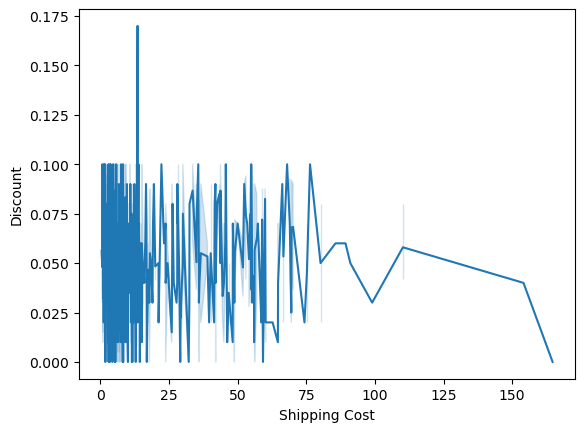

In [55]:
sns.lineplot(x="Shipping Cost", y='Discount', data=df)

## Handing Outliers

In [56]:
df = sns.load_dataset("iris")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [57]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [58]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

<Axes: >

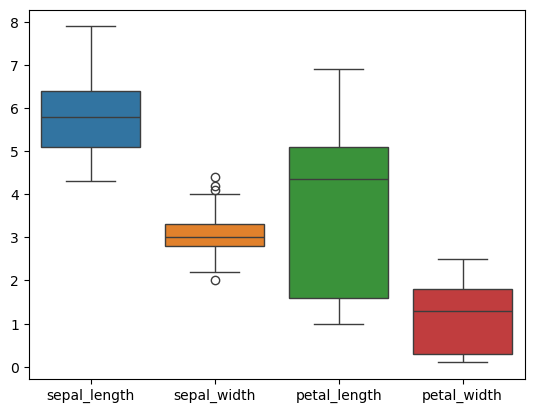

In [59]:
sns.boxplot(data=df)

In [60]:
df.shape

(150, 5)

In [61]:
# IQR
Q1 = np.percentile(df['sepal_width'], 25, method = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75, method = 'midpoint')
# print(Q1,Q3)
IQR = (Q3 - Q1)
print("Old Shape: ", df.shape)
Upper = Q3+1.5*IQR
# print(Upper)
lower =  Q1-1.5*IQR  
# print(lower)
[lower,Upper]

Old Shape:  (150, 5)


[2.05, 4.05]

In [62]:
df['sepal_width'].min(),df['sepal_width'].max()

(2.0, 4.4)

In [63]:
max_Upper_value = np.where(df['sepal_width'] >= Upper)
print(max_Upper_value[0]) 

[15 32 33]


In [64]:
# Lower bound
min_Lower_value = np.where(df['sepal_width'] <= lower)
print(min_Lower_value)

(array([60], dtype=int64),)


In [72]:
df.head(35)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [73]:
print("New Shape: ", df.shape)

New Shape:  (150, 5)


<Axes: >

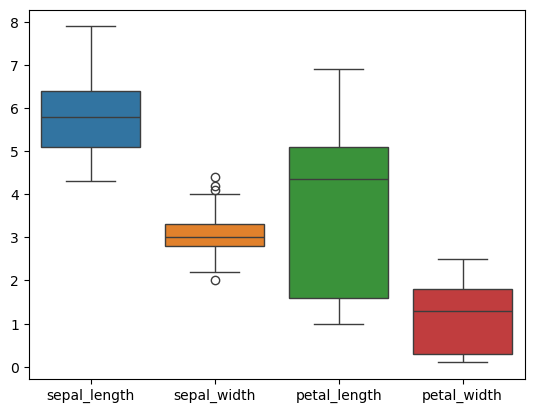

In [74]:
sns.boxplot(data=df)

<Axes: xlabel='sepal_length'>

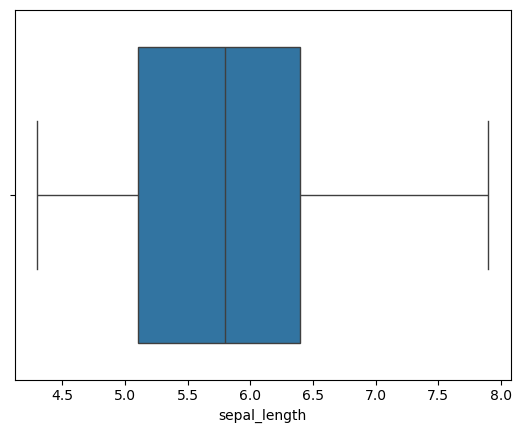

In [75]:
sns.boxplot(x='sepal_length', data=df)

<Axes: xlabel='petal_length'>

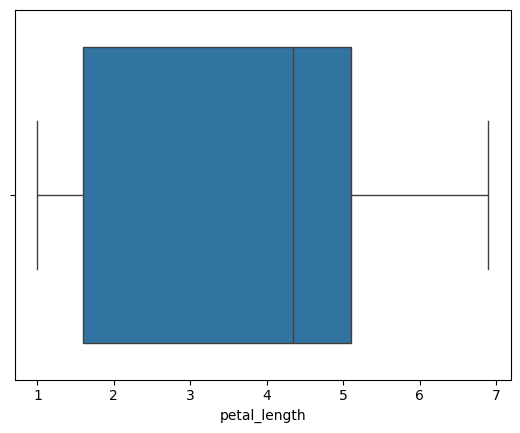

In [76]:
sns.boxplot(x='petal_length', data=df)

<Axes: xlabel='petal_width'>

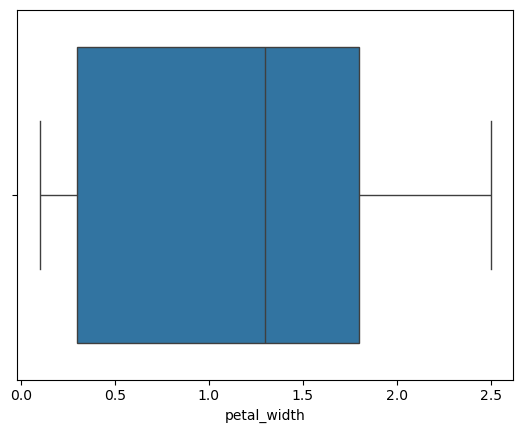

In [77]:
sns.boxplot(x='petal_width', data=df)

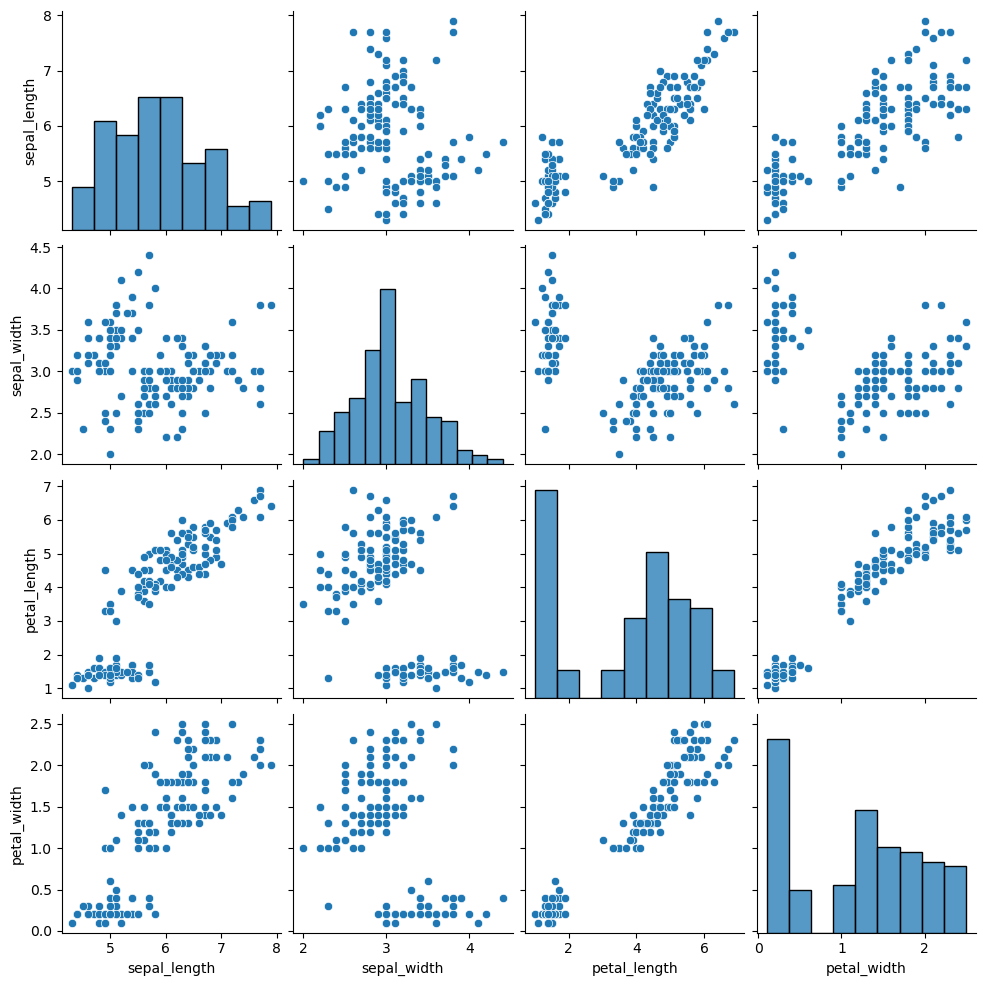

In [79]:
sns.pairplot(df)

## Logistic Regression

it belongs to the family suprevised machine leraning model

## Types 
1. Binary Logistic Regression(two possible outcomes)
2. Multinomial Logistic Regression
3. Ordinal Logistic Regression


In [53]:
#load all necessary libraries
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
claimants = pd.read_csv(r"C:\Users\J G TECH\Downloads\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [55]:
claimants.shape

(1340, 7)

In [56]:
claimants.nunique()

CASENUM     1283
ATTORNEY       2
CLMSEX         2
CLMINSUR       2
SEATBELT       2
CLMAGE        68
LOSS         916
dtype: int64

In [57]:
## Dropping the case number columns as it is not required
claimants.drop(["CASENUM"], inplace=True, axis = 1)

In [58]:
#Shape of the data set
claimants.shape

(1340, 6)

In [59]:
# Missing values

In [60]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [61]:
claimants['CLMSEX'].value_counts()

CLMSEX
1.0    742
0.0    586
Name: count, dtype: int64

In [62]:
claimants.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [63]:
#Removing NA values in data set
claimants = claimants.dropna()

In [64]:
claimants.shape

(1096, 6)

In [65]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [66]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


## Checking with linear regression model

In [67]:
#Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]
#Linear regression and fit the model
regressor = LinearRegression()
regressor.fit(X,Y)
regressor.score(X,Y)

0.06740699602264077

In [68]:
Y.shape,X.shape

((1096,), (1096, 5))

In [69]:
y_train

NameError: name 'y_train' is not defined

In [70]:
Y.shape,X.shape

((1096,), (1096, 5))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 15)

In [72]:
X_train, X_test.shape, X_test.shape, y_train.shape, y_test.shape

(      CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
 321      0.0       1.0       0.0    10.0   0.505
 775      1.0       1.0       0.0    19.0   3.777
 1007     0.0       1.0       0.0     5.0   0.500
 205      1.0       1.0       0.0    11.0   1.100
 672      1.0       0.0       0.0    33.0   0.000
 ...      ...       ...       ...     ...     ...
 104      0.0       1.0       0.0     7.0   0.589
 815      0.0       0.0       0.0    40.0   1.550
 194      1.0       1.0       0.0    33.0   0.617
 470      0.0       0.0       0.0     5.0   1.830
 787      0.0       1.0       0.0    50.0  51.146
 
 [822 rows x 5 columns],
 (274, 5),
 (274, 5),
 (822,),
 (274,))

In [73]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print('training score:,',classifier.score(X_train,y_train))

training score:, 0.708029197080292


In [74]:
print('testing score:',classifier.score(X_test,y_test))

testing score: 0.6970802919708029


In [75]:
y_pred = classifier.predict(X_train)
y_pred_df= pd.DataFrame({'actual': y_train,'predicted_prob':y_pred})
y_pred_df.head()

,actual,predicted_prob
321,1,1
775,1,0
1007,1,1
205,0,1
672,1,1


In [76]:
y_train.shape,y_pred.shape

((822,), (822,))

In [77]:
# Confusion Matrix for the model accuracy
confusion_mt = confusion_matrix(y_train,y_pred)
confusion_mt

array([[296, 150],
       [ 90, 286]], dtype=int64)

In [78]:
(296+286)/(296+150+90+286)

0.708029197080292

In [79]:
#Classification report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       446
           1       0.66      0.76      0.70       376

    accuracy                           0.71       822
   macro avg       0.71      0.71      0.71       822
weighted avg       0.72      0.71      0.71       822



In [80]:
print('Accuracy:',(296+286)/(296+150+90+286))

Accuracy: 0.708029197080292


In [81]:
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch?
## F1 score – What percent of positive predictions were correct?

In [82]:
y_predict_prob = classifier.predict_proba(X_train)[:,1]
y_predict_prob

array([5.67455246e-01, 3.62088692e-01, 5.62815041e-01, 6.09475412e-01,
       5.98049343e-01, 5.75568035e-01, 7.01757647e-01, 6.50167976e-01,
       2.98727128e-01, 7.37751685e-01, 1.98829646e-01, 6.68116475e-01,
       2.00549555e-01, 6.04742222e-01, 3.16141341e-01, 2.02119393e-06,
       5.76051284e-01, 3.18320748e-01, 6.91908757e-01, 6.09815623e-01,
       2.41081112e-01, 2.95579321e-01, 4.04537316e-02, 2.67072501e-01,
       6.87315617e-01, 4.26300397e-01, 5.88255498e-01, 6.16785846e-01,
       5.63450596e-01, 3.67084235e-01, 2.66071428e-01, 6.56649729e-01,
       5.67831713e-01, 7.34006072e-01, 4.86693454e-01, 6.57330955e-01,
       7.49662608e-01, 6.94738412e-01, 5.77482985e-01, 1.24946100e-01,
       3.24853945e-01, 6.39187809e-01, 4.31226394e-01, 8.95279849e-02,
       2.20149004e-01, 6.50790431e-01, 6.93076944e-01, 2.87479312e-01,
       5.33094896e-01, 7.19694836e-01, 6.59545058e-01, 6.62075740e-01,
       2.53007510e-01, 6.70362586e-01, 6.02760646e-01, 7.07170611e-14,
      

## ROC Curve

In [83]:
# fpr: false positive rate, tpr:True positive rate.
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_predict_prob)
auc = roc_auc_score(y_train, y_pred)
auc


0.7121577139585916

In [84]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\J G TECH\AppData\Local\Temp\ipykernel_13936\2813920545.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [85]:
import os
os.getcwd()

'C:\\Users\\J G TECH\\ Data Science'

In [86]:
# sav the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier,open(filename, 'wb'))  #wb write binary mode

## Evaluation

In [87]:
clf = pickle.load(open('finalized_model.sav', 'rb')) #rb read binary mode

In [88]:
#CLMSEX CLMINSUR SEATBELT CLMAGE LOSS

In [89]:
X =[[0,1,1,54,1500],[1,0,0,25,0]]
y_pred = clf.predict(X)
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int64)

In [90]:
y_pred1 = clf.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [91]:
clf.score(X_test,y_test)

0.6970802919708029

In [92]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       132
           1       0.70      0.74      0.72       142

    accuracy                           0.70       274
   macro avg       0.70      0.70      0.70       274
weighted avg       0.70      0.70      0.70       274



In [93]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Basic of python.ipynb',
 'Basic Python Cls 2.ipynb',
 'finalized_model.sav',
 'Untitled Folder']

## Multinomial logistic regression

In [ ]:
Description Of Data: 
The data is sourced from study of Abalone in Tasmania. 
It can be found at the UCI Machine Learning Repository.
The dataset contains 4,177 observations and 9 variables. 

SEX = M (male), F (female), I (infant) 

LENGTH = Longest shell length in mm 

DIAM = Diameter perpendicular to length in mm 

HEIGHT = Height perpendicular to length and diameter in mm 

WHOLE = Whole weight of abalone in grams 

SHUCK = Shucked weight of meat in grams 

VISCERA = Viscera weight in grams 

SHELL = Shell weight after drying in grams 

RINGS = Age (+1.5 gives the age in years) 

There are 9 variables of which the first - SEX - will be used as the dependent variable.   
 Additional Information

Predicting the age of abalone from physical measurements.  
The age of abalone is determined by cutting the shell through the cone, staining it, 
and counting the number of rings through a microscope -- a boring and time-consuming task.  
Other measurements, which are easier to obtain, are used to predict the age.  
Further information, such as weather patterns and location 
(hence food availability) may be required to solve the problem.


In [35]:
#read the dataset
import pandas as pd
abalone_df = pd.read_csv(r"C:\Users\J G TECH\AppData\Local\Microsoft\Windows\INetCache\IE\TA2P48M3\abalone[1].csv") 
abalone_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\J G TECH\\AppData\\Local\\Microsoft\\Windows\\INetCache\\IE\\TA2P48M3\\abalone[1].csv'

In [8]:
abalone_df.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

In [9]:
#We are now ready to partition the dataset:
Abalone_sex = abalone_df['Sex'].value_counts()
print(Abalone_sex)

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [10]:
abalone_df.shape

(4177, 9)

In [11]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
#Create training and test datasets
X = abalone_df.drop(['Sex'], axis=1) 
y = abalone_df['Sex']
X.shape,

((4177, 8),)

In [13]:
y = y.astype('category').cat.codes

In [14]:
y.value_counts()

2    1528
1    1342
0    1307
Name: count, dtype: int64

In [15]:
# y = label_binarize(y, classes=[0,1,2])
# n_classes = y.shape[1]

In [16]:
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X, y, test_size = 0.20, 
                                                                random_state = 5)
print(X_train_ab.shape)
print(X_test_ab.shape)
print(y_train_ab.shape)
print(y_test_ab.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [17]:
model1 = LogisticRegression(multi_class='multinomial',penalty= None,solver='newton-cg')
model1.fit(X_train_ab, y_train_ab)

LogisticRegression(multi_class='multinomial', penalty=None, solver='newton-cg')

In [18]:
model1.score(X_train_ab, y_train_ab)

0.561807841963484

In [19]:
y_pred_ab = model1.predict(X_test_ab)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': None, 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [20]:
# Intercept And Coefficients:The intercept and coefficients are stored in model1.intercept and model1.coef_ respectively. Here we need to spend a bit of time, because the output of Sci-Kit Learn is different from what we may expect. 
#Print model parameters
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-1.78721481  1.04124861  0.74596621]
Coefficients: 
 [[-6.14592869  6.60729191  3.92916352  1.87257753 -2.66890945  5.98939794
  -1.50630012  0.06142575]
 [12.17942933 -6.83042636 -5.45058045 -4.22199828  2.79760283 -8.49325133
   3.09534599 -0.12236152]
 [-6.03350064  0.22313445  1.52141693  2.34942074 -0.12869338  2.50385339
  -1.58904588  0.06093577]]


In [21]:
y_pred_df= pd.DataFrame({'actual': y_test_ab,'predicted_prob': y_pred_ab})  
y_pred_df.head()

,actual,predicted_prob
3342,2,1
791,0,2
1420,0,2
729,0,0
1186,0,0


In [22]:
#Accuracy statistics
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test_ab, y_pred_ab))  
#Create classification report
class_report=classification_report(y_test_ab, y_pred_ab)
print(class_report)

Accuracy Score: 0.5490430622009569
              precision    recall  f1-score   support

           0       0.48      0.33      0.39       270
           1       0.66      0.81      0.72       260
           2       0.48      0.53      0.50       306

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.55      0.54       836



In [23]:
confmtrx = confusion_matrix(y_test_ab,y_pred_ab)
print(confmtrx)

[[ 88  44 138]
 [ 15 210  35]
 [ 79  66 161]]


In [24]:
result = pd.DataFrame(confmtrx, index=['Female','Infant', 'Male'],
                      columns=['predicted_Female', 'predicted_Infant', 'predicted_Male'])
print(result)

        predicted_Female  predicted_Infant  predicted_Male
Female                88                44             138
Infant                15               210              35
Male                  79                66             161


In [25]:
# The first array contains three intercepts and the second  array contains three sets of regression coefficients.  
# In fact, the sklearn based output is different from the statsmodel version 
# (A discussion of Multinomial Logistic Regression with statsmodels is available below). 


# In this solution, there is an equation for each class. 
# These act as independent binary logistic regression models. 
# The actual output is log(p(y=c)/1 - p(y=c)), which are multinomial logit coefficients, 
# hence the three equations.  After exponentiating each regressor coefficient, we in fact get odds ratios. 
# The interpretation of the coefficients is for a single unit change in the predictor variable, 
# the log of odds will change by a factor indicated by the beta coefficient, given that all other 
# variables are held constant.  Log of odds is not really meaningful, so exponentiating the output gets a 
# slightly more user friendly output: 

#Calculate odds ratio estimates
import numpy as np
np.exp(model1.coef_)

array([[2.14218555e-03, 7.40475029e+02, 5.08644128e+01, 6.50504177e+00,
        6.93277894e-02, 3.99174209e+02, 2.21728832e-01, 1.06335153e+00],
       [1.94741697e+05, 1.08039738e-03, 4.29381163e-03, 1.46693019e-02,
        1.64052733e+01, 2.04846154e-04, 2.20948819e+01, 8.84828429e-01],
       [2.39708793e-03, 1.24998862e+00, 4.57870831e+00, 1.04794976e+01,
        8.79243520e-01, 1.22295285e+01, 2.04120275e-01, 1.06283065e+00]])

In [26]:
# Create DataFrame from confmtrx array  rows for test: Male, Female, Infant designation as index 
# columns for preds: male, predicted_female, predicted_infant as column
# confmtrx = confusion_matrix(y_test_ab,y_pred_ab)
# print(confmtrx)
pd.DataFrame(confmtrx, index=['Female','Infant', 'Male'],columns=['predicted_Female', 'predicted_Infant', 'predicted_Male'])


,predicted_Female,predicted_Infant,predicted_Male
Female,88,44,138
Infant,15,210,35
Male,79,66,161


In [27]:
# The accuracy of this model is poor with only 55% of predictions being correct. 
# The precision and recall of female and male abalone is very concerning as well.     

In [28]:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

abalone_df = pd.read_csv(r"C:\Users\J G TECH\AppData\Local\Microsoft\Windows\INetCache\IE\47FN4VLF\abalone[1].csv")
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
X_new = abalone_df.drop(['Sex'],axis=1)
y_new = abalone_df['Sex']
print(y_new.value_counts())

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [30]:
Y = label_binarize(y_new, classes=['M','I','F'])
n_classes = Y.shape[1]

In [31]:
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X, y, test_size = 0.20, 
                                                                random_state = 5)
print(X_train_ab.shape)
print(X_test_ab.shape)
print(y_train_ab.shape)
print(y_test_ab.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [32]:
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train_ab, y_train_ab).decision_function(X_test_ab)
y_score

array([[-1.17365333, -0.39996125, -0.79532622],
       [-1.03862518, -0.4066039 , -0.88497684],
       [ 0.05674755, -4.37203419,  0.23913321],
       ...,
       [ 0.73672268, -6.0586992 ,  0.48342514],
       [-1.89620557,  0.80541207, -1.14518029],
       [-0.54066099, -2.17057039, -0.31831514]])

In [33]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y_test_ab[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#Compute a micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _=  roc_curve(y_test_ab.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot
plt.figure()
plt.plot(fpr[2], tpr[2],label = 'ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

In [34]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
        ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                    ''.format(i, roc_auc[i]))
    

plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

KeyError: 'micro'

<Figure size 640x480 with 0 Axes>

In [35]:
!pip install flask
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [175]:
import flask
import streamlit

In [176]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
